In [3]:
import pandas as pd
import networkx as nx


In [228]:
final_df= pd.read_csv("../Data/final_merged_df.csv", delimiter=',')


In [229]:
film1 = df[df['Wikipedia movie ID'] == 31186339]
film2 = df[df['Wikipedia movie ID'] == 20663735]


In [233]:
import networkx as nx

def create_networkx_graph(df):
    """
    Create a NetworkX directed graph from a DataFrame containing three columns:
    Char A, Char B, and Combined_action.

    Each node in the graph is a number with a 'name' attribute storing the character's name.

    Args:
    df (pd.DataFrame): Input DataFrame with columns Char A, Char B, and Combined_action.

    Returns:
    nx.DiGraph: NetworkX directed graph representing the relationships.
    """
    G = nx.DiGraph()
    name_to_number = {}  # Mapping from character names to numbers
    current_number = 0   # Current number to assign to a new node

    for _, row in df.iterrows():
        char_a = row['char A']
        char_b = row['char B']
        action = row['combined_action']

        # Assign numbers to char_a and char_b if not already assigned
        if char_a not in name_to_number:
            name_to_number[char_a] = current_number
            current_number += 1
        if char_b not in name_to_number:
            name_to_number[char_b] = current_number
            current_number += 1

        # Get the numbers corresponding to char_a and char_b
        num_a = name_to_number[char_a]
        num_b = name_to_number[char_b]

        # Add nodes with 'name' attribute
        G.add_node(num_a, name=char_a)
        G.add_node(num_b, name=char_b)

        # Add edge
        G.add_edge(num_a, num_b, label=action)


    return G


In [239]:
final_df.groupby(['Wikipedia movie ID'])

In [235]:
for film in 
G1 = create_networkx_graph(film1)
G2 = create_networkx_graph(film2)

In [237]:
list_graphs.append(G2)

In [140]:
# Assuming G is your graph created by create_networkx_graph

# List all edges with their labels
for u, v, data in G1.edges(data=True):
    print(f"Edge from {u} to {v} has label: {data.get('label')}")

# Access label of a specific edge
# Replace 'node_a' and 'node_b' with the specific nodes you're interested in
if G1.has_edge('node_a', 'node_b'):
    label = G['node_a']['node_b'].get('label')
    print(f"The label of the edge from 'node_a' to 'node_b' is: {label}")


Edge from 0 to 1 has label: tell
Edge from 0 to 3 has label: hurl
Edge from 1 to 0 has label: discover
Edge from 1 to 2 has label: comfort the dying
Edge from 1 to 3 has label: shoot
Edge from 2 to 1 has label: call
Edge from 4 to 1 has label: warn


# Graph comparison structure

We could use different metrics:
- Persona distribution distance (Cosine similarity)
- Edge clusters distribution distance (Cosine similarity)
- Portrait distance (see it from [This link](https://www.nature.com/articles/s41598-019-53708-y))
    - Why portrait distance? There is an already implemented library and from the paper above seems to be an optimal method for directed graphs

In [30]:
import netrd

In [34]:
dist = netrd.distance.PortraitDivergence()
D = dist.dist(G1, G2)
print(D)

0.10162368452869114


# Graph comparison personas

# Graph comparison edges

# Graph visualization

In [17]:
import json
import networkx as nx

data = {
    "nodes": [{"id": n} for n in G1.nodes()],
    "links": [{"source": u, "target": v, "label": d['label']} for u, v, d in G1.edges(data=True)]
}

# Export to JSON
with open('graph.json', 'w') as f:
    json.dump(data, f)

# Save the JSON to files
with open('graph1.json', 'w') as f:
    json.dump(d3_json_g1, f)
with open('graph2.json', 'w') as f:
    json.dump(d3_json_g2, f)


In [139]:
G['node_a']['node_b'].get('label')

KeyError: 'node_a'

In [27]:
print(G.nodes[1]["club"])

Mr. Hi


In [71]:
G1.nodes[4]["name"]

'Rue'

### Test

In [39]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

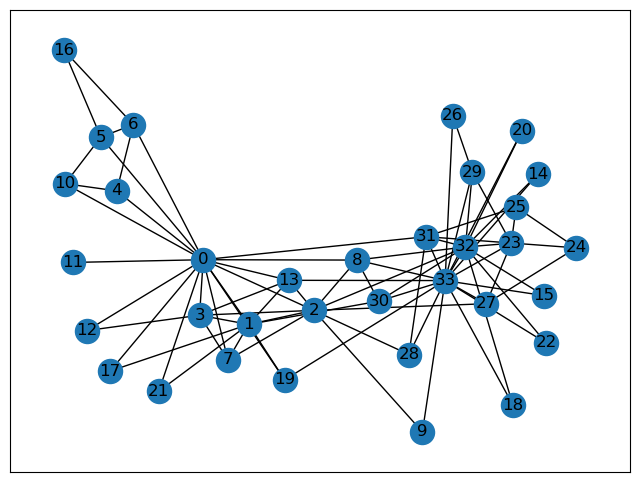

In [40]:
g = nx.karate_club_graph()
fig, ax = plt.subplots(1, 1, figsize=(8, 6));
nx.draw_networkx(g, ax=ax)

In [141]:
# Create the nodes list (assuming you're still only including integer nodes)
nodes = [{'name': G1.nodes[i]["name"] if "name" in G1.nodes[i] else i} for i in G1.nodes() if isinstance(i, int)]

# Create a mapping from node names to indices (if your nodes have string labels)
name_to_index = {name: index for index, name in enumerate(G1.nodes()) if isinstance(name, str)}

# Create the links list, including edge labels
links = [{'source': name_to_index.get(u[0], u[0]),
          'target': name_to_index.get(u[1], u[1]),
          'label': G1.edges[u]['label']} for u in G1.edges()]

# Write to a JSON file
with open('graph.json', 'w') as f:
    json.dump({'nodes': nodes, 'links': links}, f, indent=4)


In [142]:
print(links)

[{'source': 0, 'target': 1, 'label': 'tell'}, {'source': 0, 'target': 3, 'label': 'hurl'}, {'source': 1, 'target': 0, 'label': 'discover'}, {'source': 1, 'target': 2, 'label': 'comfort the dying'}, {'source': 1, 'target': 3, 'label': 'shoot'}, {'source': 2, 'target': 1, 'label': 'call'}, {'source': 4, 'target': 1, 'label': 'warn'}]


In [227]:
%%javascript
// We load the d3.js library from the Web.
require.config({paths:
    {d3: "http://d3js.org/d3.v3.min"}});
require(["d3"], function(d3) {
  // The code in this block is executed when the
  // d3.js library has been loaded.

  // First, we specify the size of the canvas
  // containing the visualization (size of the
  // <div> element).
  var width = 500, height = 300;

  // We create a color scale.
  var color = d3.scale.category10();

  // We create a force-directed dynamic graph layout.
  var force = d3.layout.force()
    .charge(-120)
    .linkDistance(120)
    .size([width, height]);

  // In the <div> element, we create a <svg> graphic
  // that will contain our interactive visualization.
  var svg = d3.select("#d3-example").select("svg")
  if (svg.empty()) {
    svg = d3.select("#d3-example").append("svg")
          .attr("width", width)
          .attr("height", height);
  }

  // We load the JSON file.
  d3.json("graph.json", function(error, graph) {
    // In this block, the file has been loaded
    // and the 'graph' object contains our graph.

    // We load the nodes and links in the
    // force-directed graph.
    force.nodes(graph.nodes)
      .links(graph.links)
      .start();
      
    var linkCount = {};

    graph.links.forEach(function(d) {
        if (linkCount[d.source + "," + d.target]) {
            linkCount[d.source + "," + d.target]++;
        } else if (linkCount[d.target + "," + d.source]) {
            linkCount[d.target + "," + d.source]++;
        } else {
            linkCount[d.source + "," + d.target] = 1;
        }
        d.linknum = linkCount[d.source + "," + d.target];
    });

    // Function to generate a path for each link
    function linkPath(d) {
        var curvature = 0.5;
        var dx = d.target.x - d.source.x,
            dy = d.target.y - d.source.y,
            dr = Math.sqrt(dx * dx + dy * dy) * (d.linknum - 1) * curvature;
        return "M" + d.source.x + "," + d.source.y + 
               "A" + dr + "," + dr + " 0 0,1 " + d.target.x + "," + d.target.y;
    }

    // Create a group for each link
    var linkGroup = svg.selectAll(".link-group")
        .data(graph.links)
        .enter().append("g")
        .attr("class", "link-group");

    // Create the line element within each group
    var link = linkGroup.append("line")
        .attr("class", "link")
        .attr("d", linkPath);

    // Create the text label within each group
    var linkText = linkGroup.append("text")
        .attr("class", "link-text")
        .text(function(d) { return d.label; });
      
    // We create a <circle> SVG element for each node
    // in the graph, and we specify a few attributes.
    var node = svg.selectAll(".node")
      .data(graph.nodes)
      .enter().append("circle")
      .attr("class", "node")
      .attr("r", 5)  // radius
      .style("fill", function(d) {
         // The node color depends on the club.
         return color(d.club);
      })
      .call(force.drag);

    // The name of each node is the node number.
    node.append("title")
        .text(function(d) { return d.name; });

    // We bind the positions of the SVG elements
    // to the positions of the dynamic force-directed
    // graph, at each time step.
    force.on("tick", function() {
        link.attr("d", linkPath);
        // Position the lines
        link.attr("x1", function(d) { return d.source.x; })
            .attr("y1", function(d) { return d.source.y; })
            .attr("x2", function(d) { return d.target.x; })
            .attr("y2", function(d) { return d.target.y; });

        // Position the nodes
        node.attr("cx", function(d) { return d.x; })
            .attr("cy", function(d) { return d.y; });

        // Position the link labels
        linkText.attr("x", function(d) {
            return (d.source.x + d.target.x) / 2;
        })
        .attr("y", function(d) {
            return (d.source.y + d.target.y) / 2;
        });
    });

  });
});

<IPython.core.display.Javascript object>

In [226]:
%%html
<div id="d3-example"></div>
<style>
.node {stroke: #fff; stroke-width: 1.5px;}
.link {stroke: #999; stroke-opacity: .6;}
.link-text {
    font-size: 10px; /* Adjust the size as needed */
    fill: grey;      /* Sets the text color to grey */
}
</style>